# CS - Craft Story.

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('adult.csv')

In [55]:
df.head().T

,0,1,2,3,4
age,25,38,28,44,18
workclass,Private,Private,Local-gov,Private,?
fnlwgt,226802,89814,336951,160323,103497
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college
educational-num,7,9,12,10,10
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
occupation,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,?
relationship,Own-child,Husband,Husband,Husband,Own-child
race,Black,White,White,Black,White
gender,Male,Male,Male,Male,Female


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [57]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [58]:
sns.set()

## Explore Data

To start exploring our data in and efficient manner, lets go down the list of features and visualize our data. This will help us paint a clear picture of our dataset.

First let's look at 'age'.

### AGE

/Users/mohsin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


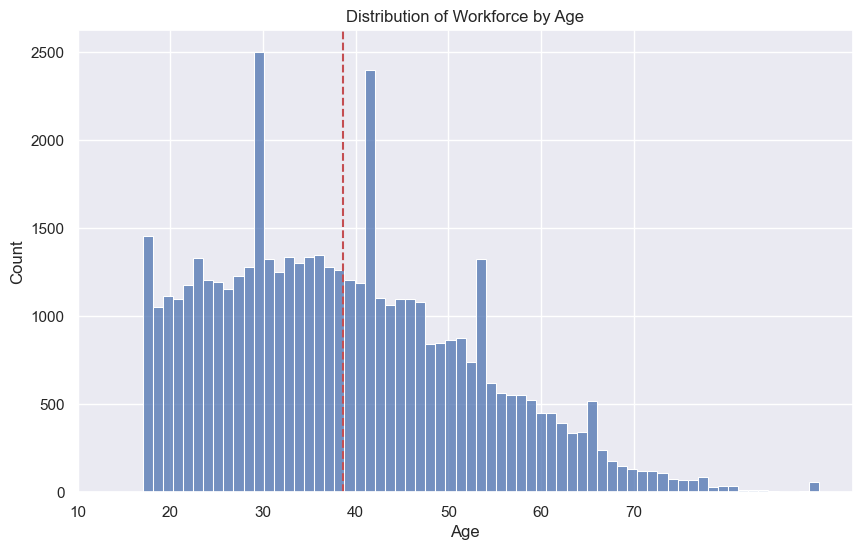

In [86]:
# Create a count plot using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(x=df['age'])
# Calculate mean age
mean_age = df['age'].mean()
# Add mean age as a vertical line
plt.axvline(mean_age, color='r', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Workforce by Age')

# Set custom ticks
plt.xticks(np.arange(10, 80, 10))  # Adjust range and step size as needed

# Show the plot
plt.show()

Here we have the workforce distribution by age, as we can see mean age distribution is around ~39 years old and Median age ~37 years old.

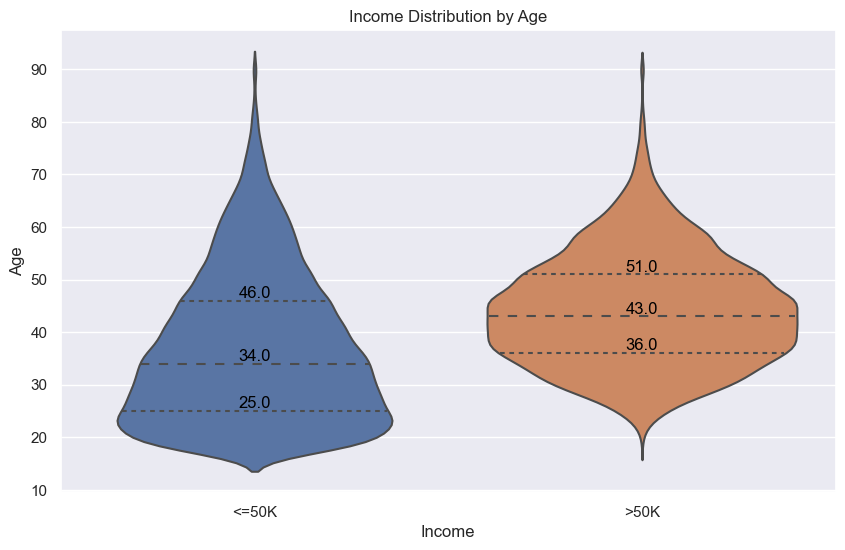

In [80]:
# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.violinplot(x='income', y='age', data=df, inner='quartile')

# Add quartile info
for i, group_data in enumerate(df.groupby('income')['age']):
    quartiles = group_data[1].describe(percentiles=[.25, .5, .75]).loc[['25%', '50%', '75%']]
    for j, quartile in enumerate(quartiles):
        plt.text(i, quartile, f'{quartile}', horizontalalignment='center', verticalalignment='bottom', color='black')

# Add labels and title
plt.title('Income Distribution by Age')
plt.xlabel('Income')
plt.ylabel('Age')

# Show the plot
plt.show()

This Violin plot paints a pretty picture of what the income distribution looks like by age. Low age median for lower income bracket of '<=50K' indicates young workers tends to get paid less compared to high age median for higher income bracket of '>50k'

###  Gender

In [74]:
df_gender = df[['gender', 'income']]

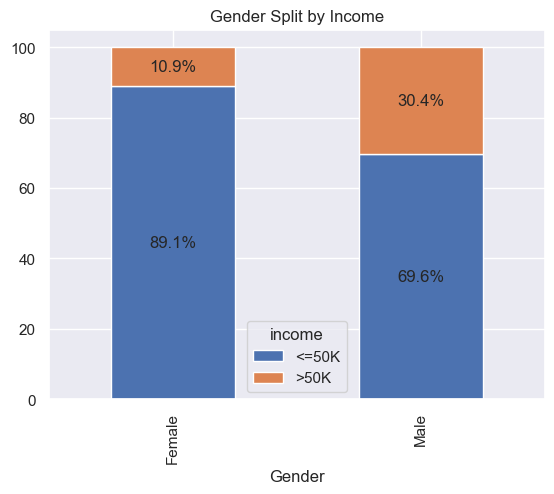

In [75]:
# Create a pivot table to get the count of each gender by income
p_table = df_gender.pivot_table(index='gender', columns='income', aggfunc=len, fill_value=0)
# Calculate the total count for each gender
gender_totals = p_table.sum(axis=1)
# Convert counts to percentages
pivot_table_percentage = p_table.divide(gender_totals, axis=0) * 100
# Create the stacked bar chart using seaborn
# Create the stacked bar chart using seaborn
ax = pivot_table_percentage.plot(kind='bar', stacked=True)
# Add labels and title
plt.title('Gender Split by Income')
plt.xlabel('Gender')

# Add percentage labels on stacked bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', 
            horizontalalignment='center', verticalalignment='center')

# Show the plot
plt.show()

Here we see a clear Gender income in-equality between male and female. The above plot shows 30% of men make more than 50k, whereas only ~11% of women make more than 50K.

Lets dig a little deeper by splitting the income by gender and age.

In [81]:
df_gender = df[['gender', 'income', 'age']]

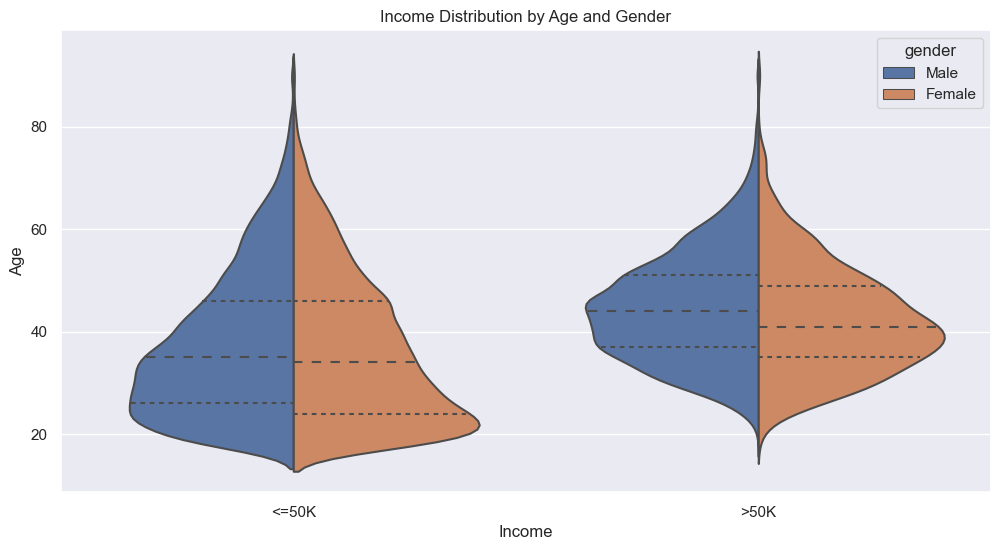

In [85]:
# Create the violin plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.violinplot(x='income', y='age', hue='gender', data=df_gender, split=True, inner='quartile')

# Add labels and title
plt.title('Income Distribution by Age and Gender')
plt.xlabel('Income')
plt.ylabel('Age')

# Show the plot
plt.show()

This observation is intriguing. It appears that the median age of the female workforce is lower than that of males, and further analysis reveals that even among those earning >$50k annually, the median age of women is lower than that of men. This suggests that although women constitute a smaller proportion of high earners compared to men, they tend to be younger. One possible explanation for this trend could be the increasing representation of women from younger generations with different career goals than older generations.

In [94]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

### Education

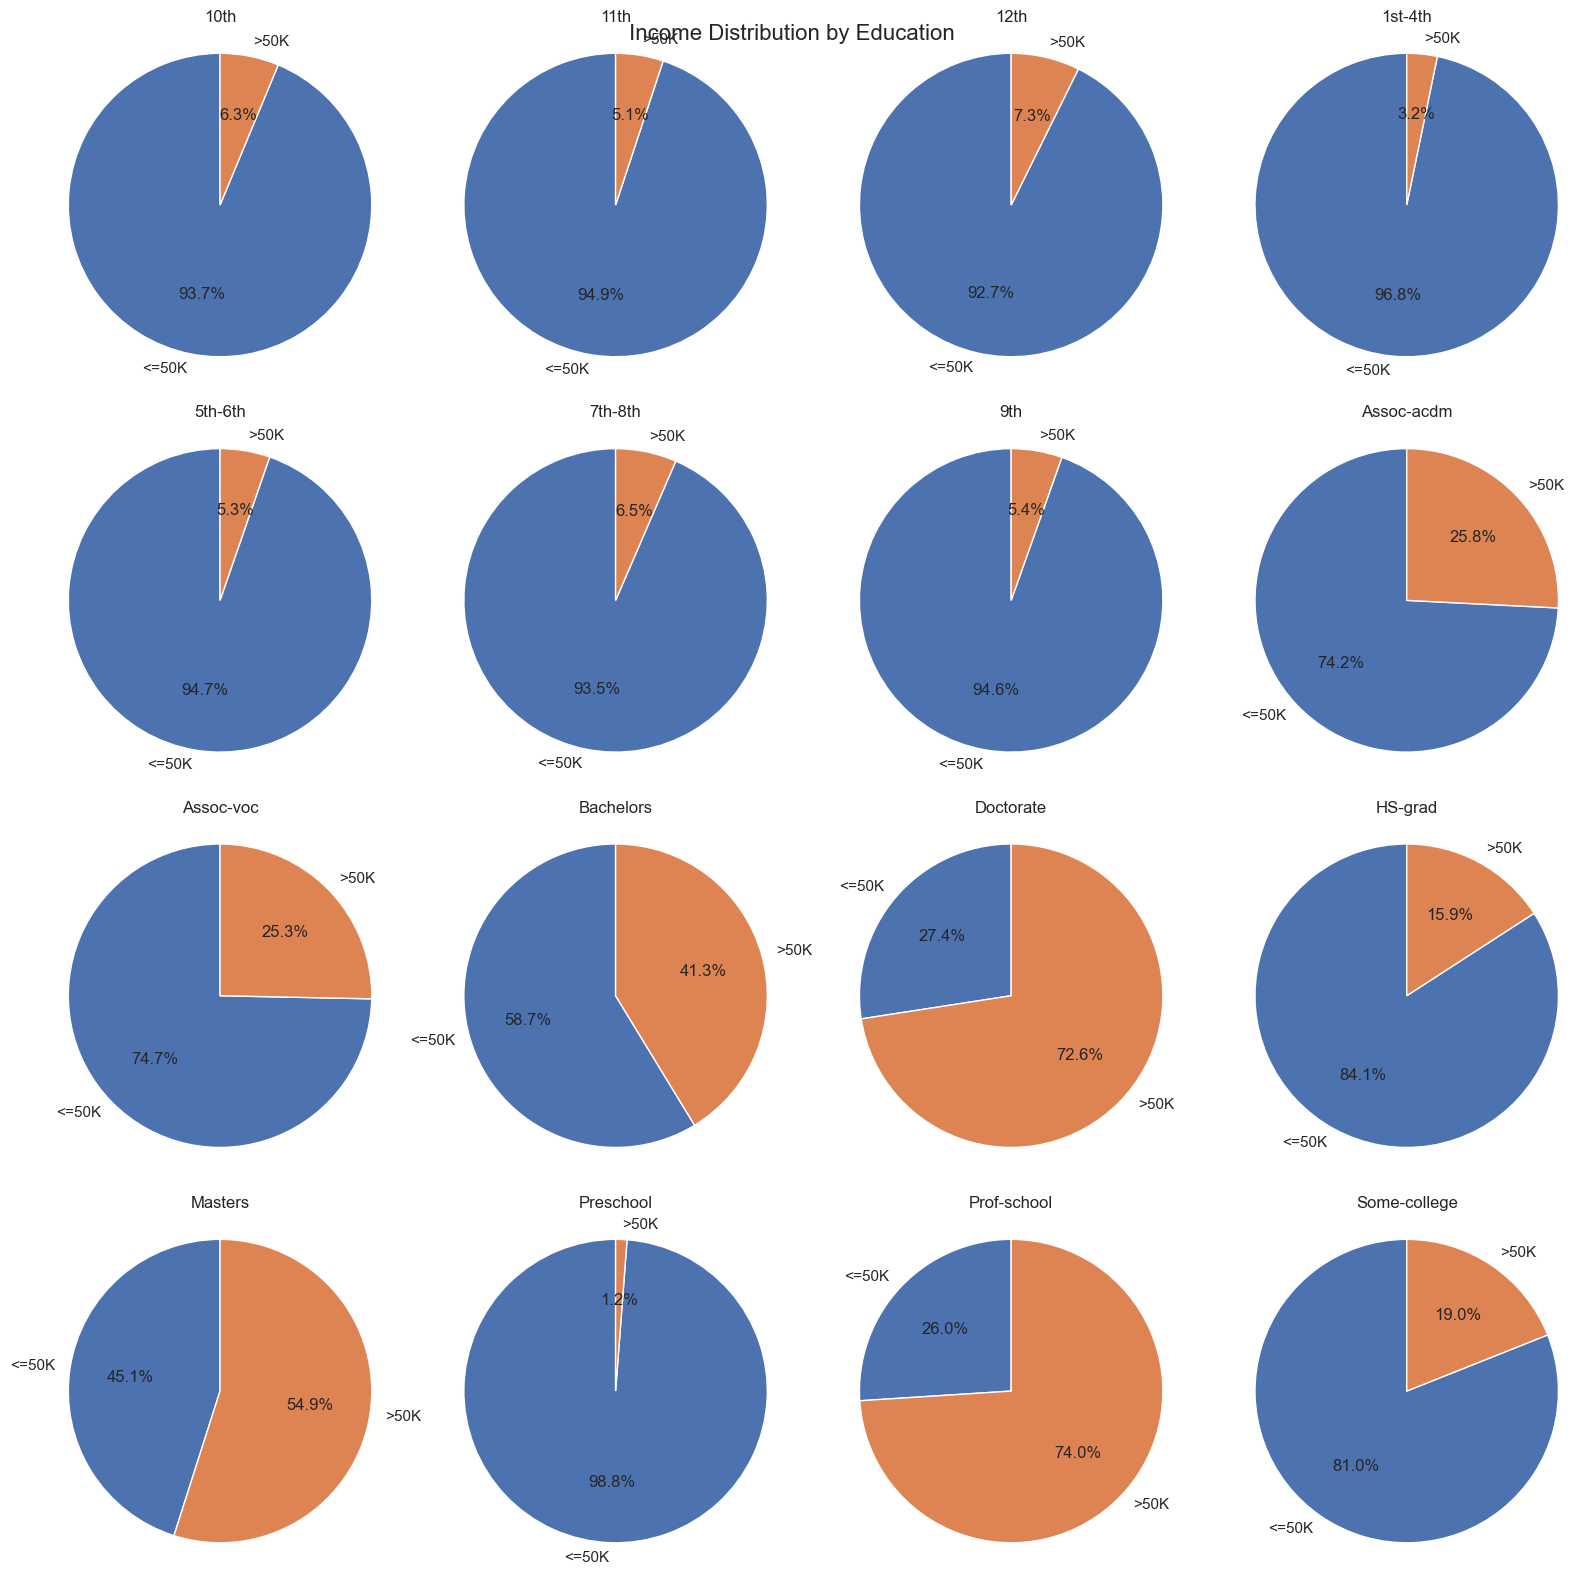

In [97]:
# Calculate the counts of income levels for each education category
education_income_counts = df.groupby(['education', 'income']).size().unstack(fill_value=0)

# Create a pie chart for each education category
fig, axes = plt.subplots(4, 4, figsize=(16, 16))  # Adjust the number of rows and columns as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each education category
for i, (education, income_counts) in enumerate(education_income_counts.iterrows()):
    ax = axes[i]
    ax.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(education)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout
plt.tight_layout()
# Set main title
plt.suptitle('Income Distribution by Education', fontsize=16)
# Show the plot
plt.show()

Here's a beautiful piechart of Income distribution by education. We can see a steady increase in % of workforce making >50k as their education levels go up. Workforce with education less than HS-grad getting paid >50k is less than 7.3%. As you go higher in education levels, we have bachelors at 41%, Masters at 54.9%, and PHd at 72.6%.

### Marital Status

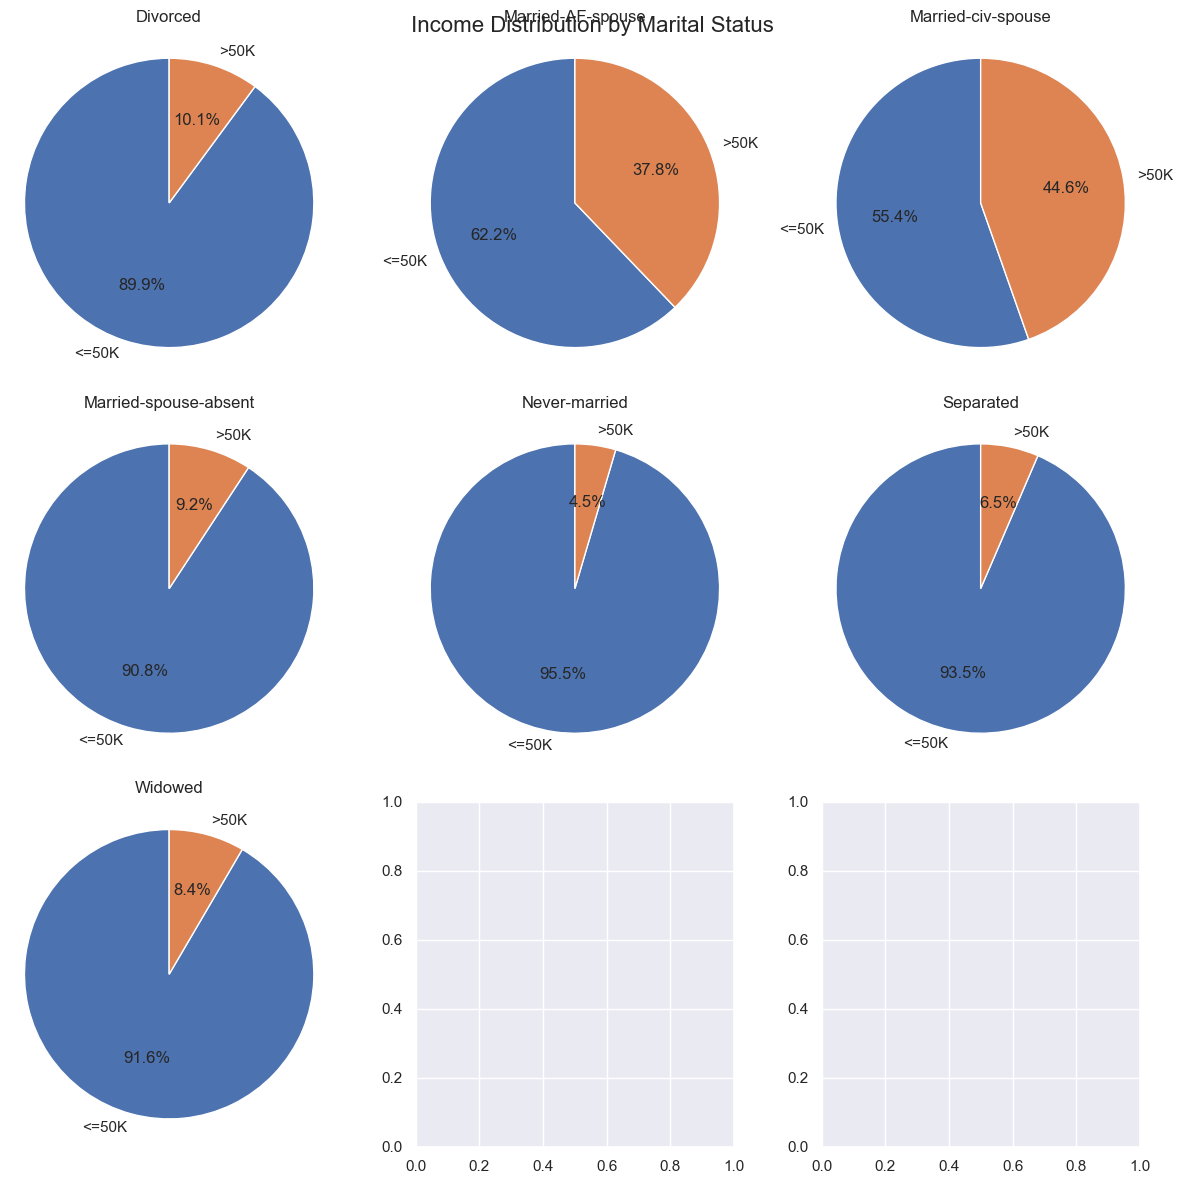

In [98]:
# Calculate the counts of income levels for each marital status
marital_income_counts = df.groupby(['marital-status', 'income']).size().unstack(fill_value=0)

# Create a pie chart for each marital status
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Adjust the number of rows and columns as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each marital status
for i, (marital_status, income_counts) in enumerate(marital_income_counts.iterrows()):
    ax = axes[i]
    ax.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(marital_status)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout
plt.tight_layout()

# Set main title
plt.suptitle('Income Distribution by Marital Status', fontsize=16)

# Show the plot
plt.show()

A lot can be interpreted from these marital-status piechart. For example, Married couples tend to have the highest income, possibly due to married couples are older in age vs never-married individuals. Another example of an insight we can gain from this is divorced or seperated couples tend to have lower percentage with high income, financial burdens are one of the leading factors for divorce in United States.

### Work Class

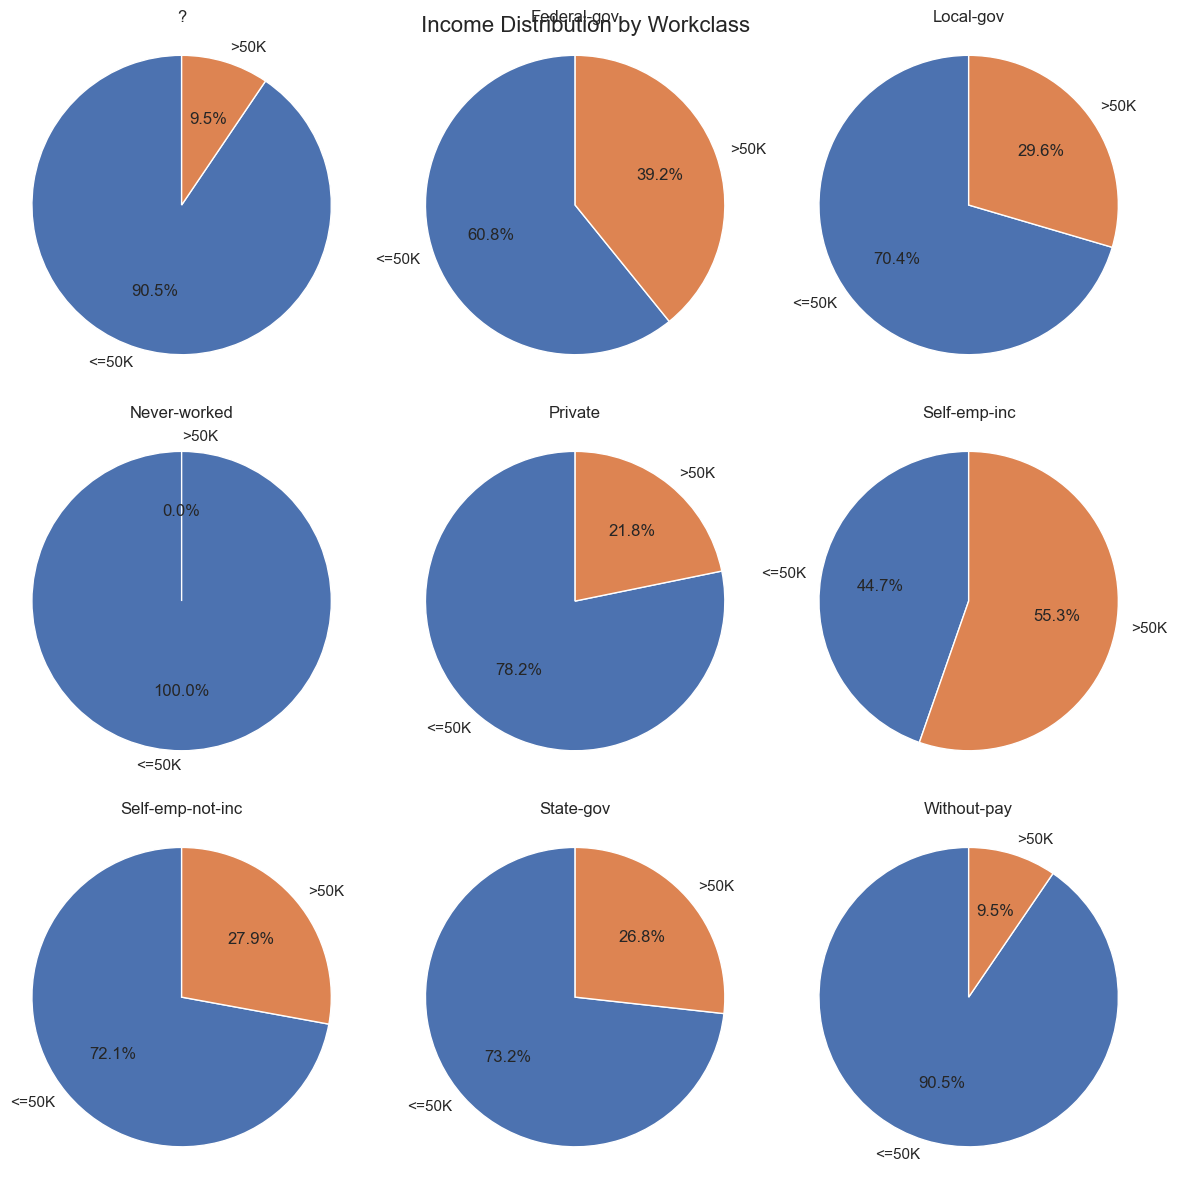

In [104]:
workclass_income_counts = df.groupby(['workclass', 'income']).size().unstack(fill_value=0)

# Create a pie chart for each workclass
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Adjust the number of rows and columns as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each workclass
for i, (workclass, income_counts) in enumerate(workclass_income_counts.iterrows()):
    ax = axes[i]
    ax.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(workclass)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout
plt.tight_layout()

# Set main title
plt.suptitle('Income Distribution by Workclass', fontsize=16)

# Show the plot
plt.show()

Working class income distribution is as expected as well. Most self imployed individuals have a higher chance of making more than $50k, followed by Federal-goverment employees and lastly private. Private is lower than federal-goverment since it covers a broader spectrum of jobs from fast-food restaurants to high paying tech companies. 